# Tut4: Machine Learning Classification

In [1]:
#recall our previously saved files
%store -r Ygd
%store -r Xgd_arrayRol 
%store -r selected_GDindexes 

In [2]:
#convert Y to boolean
Ygd = Ygd.map({'S': 1, 'B': 0})
Ygd

0      0
1      0
2      1
3      1
4      0
      ..
542    1
543    0
544    0
545    1
546    1
Name: Condition, Length: 547, dtype: int64

#### Training the machine learning model

In [3]:
#Importing Packages

import sys
sys.path.append("..")
####
from sklearn.ensemble import RandomForestClassifier # a ML method
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
from source.utils import split #  a pre-defined function to split the data into training and testing|

In [4]:
# ___Cell no. 4___

acc_list_gd = [] # a list to save the accuracy score for the 4 different datasets we have
prec_list_gd = [] # a list to save the precision score for the 4 different datasets we have
for x_rol,boolInd_gd in zip (Xgd_arrayRol, selected_GDindexes):
    print(x_rol.shape)
    print(boolInd_gd.shape) # a boolean array to select the best 10 features
    Xgdtrain, Xgdtest, Ygdtrain, Ygdtest  = split( x_rol.values[:,boolInd_gd], Ygd )
    print("X training shape:" + str(Xgdtrain.shape))
    print("Notice that we reduced the number of features from " + str(x_rol.shape[1]) + " to " + str(Xgdtrain.shape[1]))
    RF_gd = RandomForestClassifier(random_state=0, n_estimators=500) #defining the model
    RF_gd.fit(Xgdtrain, Ygdtrain) # training the machine learning model
    ygd_pred = RF_gd.predict(Xgdtest)
    
#### Calculating the scores
    prec_gd = precision_score(Ygdtest.values, ygd_pred)
    print("precision score= "+str(prec_gd))

#### appending the score to a list
    prec_list_gd.append(prec_gd) # append the precision score to a list.
    
#### Done
    print('##########')

(547, 207)
(207,)
X training shape:(382, 10)
Notice that we reduced the number of features from 207 to 10
precision score= 0.782608695652174
##########
(547, 69)
(69,)
X training shape:(382, 10)
Notice that we reduced the number of features from 69 to 10
precision score= 0.8021978021978022
##########
(547, 41)
(41,)
X training shape:(382, 10)
Notice that we reduced the number of features from 41 to 10
precision score= 0.7727272727272727
##########
(547, 20)
(20,)
X training shape:(382, 10)
Notice that we reduced the number of features from 20 to 10
precision score= 0.8
##########


#### Displaying the models perfomance relative to the baseline

Now let us compare the Precision scores


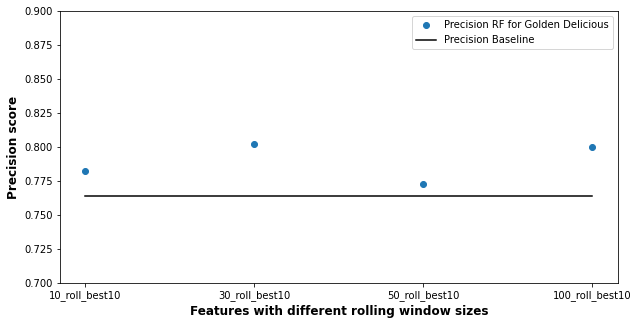

In [9]:
import matplotlib.pyplot as plt

print("Now let us compare the Precision scores")
plt.figure(figsize=(10, 5))

mystring = "roll_"
    
# We make the second curve dashed so that it doesn't cover up the first
plt.scatter([ str(s) + "_roll_best10" for s in [10, 30, 50, 100] ], prec_list_gd, label = "Precision RF for Golden Delicious")
plt.plot([ str(s) + "_roll_best10" for s in [10, 30, 50, 100] ], [0.764]*len(prec_list_gd), label = "Precision Baseline", color = "black")



# plt.title("GS apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Features with different rolling window sizes", fontweight ='bold', fontsize =12)
plt.ylabel("Precision score", fontweight ='bold', fontsize =12)
plt.ylim([.7,.9])

plt.legend()

plt.show()